# Aircraft Risk Assessment for Aircraft Investment

## 1. Business Understanding
### 1.1 Background

Huru Capital Investments Group is a Venture Capital firm with a presence in the construction, real estate and logistics sector in the United States of America. Given its strategic goal to diversify its portfolio, the company is exploring expansion into high growth industries such as the aviation sector. This decision is driven by the expected growth in regional and international air transport. 

The Company intends to purchase and operate airplanes for commercial and private use and hence safety is a critical consideration in selecting the right aircraft.

To support this move, Huru Capital Investments Group is leveraging historical aviation accident data from 1962 to 2023 using a [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) from the National Transportation Safety Board to evaluate potential risks associated with various types of aircraft. This analysis will inform executive decision making on which aircraft models offer the best balance between performance and operational safety.

### 1.2 Objectives

The overall objective of this project is to identify the types of aircraft with the lowest historical risk profile based on accident frequency, severity and related factors. These insights will guide Huru Capital's aviation investment strategy by pinpointing safe and reliable aircraft for acquisition.

The specific objectives are:
* To analyse accident frequency and the severity by the type of aircraft
* To identify trends  and patterns related to aviation accidents and incidents over time and geographical location
* To recommend the top three types of aircraft for investment based on safety performance

### 1.3 Problem Statement

Huru Capital Investments Group is interested in entering the aviation industry without any internal expertise on the potential risks of aircraft. Given the potential financial and reputational risks associated with aviation accidents, the company must base its aircraft selection on data-driven insights. 

This analysis will help answer the following question:

> *Which types of aircraft present the lowest investment risk based on historical safety records?*

### 1.4 Metrics of Success

This project will be considered successful if:

* The analysis identifies aircraft types with historically low accident and fatality rates, helping the company make informed investment decisions.
* At least three clear evidence based recommendations are provided to guide aircraft acquisition
* Key safety patterns (by aircraft type, location, cause or time) are clearly visualised making the risks and opportunities easy to interpret
* The insights directly support Huru Capital's broader goal of expanding into new industries with minimised operational and reputational risk

## 2. Data Understanding

This entails an initial data exploration so as to get an understanding of the shape, structure, contents and quality of the data. 

The data to be utilised in this analysis is drawn from the National Transportation Safety Board Database which contains information from 1962 to 2023 on civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters. 

The source of the dataset is https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

The dataset has two csv files:
* AviationData.csv
* USState_Codes.csv

The aim of this is to:
* identify key variables and their data types
* detect missing or inconsistent values
* gain familiarity with trends, distributions or anomalies

In [302]:
#import the relevant python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 Initial Data Exploration of Aviation Data

In [303]:
#load the aviation dataset
aviation_df = pd.read_csv('Data/AviationData.csv', encoding='latin-1')

C:\Users\rotic\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [304]:
#preview the first 5 rows
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [305]:
#preview the last 5 rows
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


#### Observation

The dataset is uniform from top to bottom

In [306]:
#get the shape of the dataframe (no of rows, no of columns)
aviation_df.shape

(88889, 31)

In [307]:
#get the summary of information on the aviation dataframe
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

#### Observation

The Aviation Dataframe has **88889 rows** and **31 columns**.
It is composed of two data types:
* Numerical data - Float (5 columns)
* Categorical data - Object (26 columns)

27 columns have null values (float(5) and object(22)) with varying null values. The key columns with null values that will need to be cleaned during preparation for analysis are:
* Severity of Injuries
* Total Fatal Injuries
* Total Serious Injuries
* Total Minor Injuries
* Total Uninjured
* Aircraft Make
* Aircraft Model
* Location
* Event Date
* Weather Condition
* Number of Engines
* Type of Engines
* Purpose of Flight
* Broad Phase of Flight

There is information on date provided under the Event Date and Publication Date columns which is represented as object data type but should be converted into date-time data type to allow for trend analysis.

The Location column contains information in both uppercase and lowercase which should be standardised for parsing.

Many events have **zero fatalities** which are still important for identifying incident prone aircraft.

In [308]:
# getting concise statistical summary of numerical data
aviation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number.of.Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total.Fatal.Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total.Serious.Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total.Minor.Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total.Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [309]:
# getting concise statistical summary of categorical data
aviation_df.describe(include='O').T

,count,unique,top,freq
Event.Id,88889,87951,20001212X19172,3
Investigation.Type,88889,2,Accident,85015
Accident.Number,88889,88863,DCA22WA130,2
Event.Date,88889,14782,1982-05-16,25
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25592,332739N,19
Longitude,34373,27156,0112457W,24
Airport.Code,50249,10375,NONE,1488
Airport.Name,52790,24871,Private,240


### 2.2 Initial Data Exploration of US State Codes data

In [310]:
#Load the US State Codes dataset
USStateCodes_df = pd.read_csv('Data/USState_Codes.csv', encoding='latin-1')

In [311]:
#Preview the first 5 rows
USStateCodes_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [312]:
USStateCodes_df.tail()

,US_State,Abbreviation
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO
61,Pacific ocean,PO


#### Observation

The dataset is uniform from top to bottom

In [313]:
USStateCodes_df.shape

(62, 2)

In [314]:
USStateCodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


#### Observation

The US State Codes Dataframe has **62 rows** and **2 columns**. The data type of the columns is categorical(object). There are no null values.

## 3. Data Preparation

This section includes
* Data cleaning - This entails dropping irrelevant columns, trimming whitespace, handling inconsistent naming, dealing with missing values(Decide whether to impute, drop or create 'Unknown' categories.
* Feature engineering - This entails creating new variables needed for analysis from the available variables such as fatality_rate = total_fatal_injuries / total_aboard and converting the date datatype to date time to enable extraction of the year and month.
* Exploratory Data Analysis - This involves univariate, bivariate and multivariate analysis by application of filters.

### 3.1 Data Cleaning

The raw dataset contains valuable information but also inconsistencies and missing values that could skew the results. This step focuses on:

- Converting columns to the appropriate data types(e.g dates, categories)
- Handling missing or incomplete values
- Standardizing categorical data (e.g Aircraft Make)
- Creating new variables (e.g fatality rate, year, month)

In [315]:
#create a copy of the original aviation_df for cleaning
aviation_df1 = aviation_df.copy(deep=True)

#check the first 5 rows
aviation_df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


#### 3.1.1. Checking the columns

In [316]:
#checking the columns
aviation_df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [317]:
#change the "." separator to "_" in the columns
aviation_df1.columns = aviation_df1.columns.str.replace('.', '_')
aviation_df1.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

#### 3.1.2 Checking the columns data types

In [318]:
aviation_df1.dtypes

Event_Id                   object
Investigation_Type         object
Accident_Number            object
Event_Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport_Code               object
Airport_Name               object
Injury_Severity            object
Aircraft_damage            object
Aircraft_Category          object
Registration_Number        object
Make                       object
Model                      object
Amateur_Built              object
Number_of_Engines         float64
Engine_Type                object
FAR_Description            object
Schedule                   object
Purpose_of_flight          object
Air_carrier                object
Total_Fatal_Injuries      float64
Total_Serious_Injuries    float64
Total_Minor_Injuries      float64
Total_Uninjured           float64
Weather_Condition          object
Broad_phase_of_flight      object
Report_Status 

#### Observation
The Event_Date and Publication_Date are of the Object Data type yet they should be of the date time datatype so as to enable trend analysis and coming up with a new column of year from the data.

In [319]:
#converting to datetime datatype 
aviation_df1['Event_Date'] = pd.to_datetime(aviation_df1['Event_Date'].str.strip('-'))
aviation_df1['Publication_Date'] = pd.to_datetime(aviation_df1['Publication_Date'].str.strip('-'))

#check if the Event Date and Publication Date have been converted to datetime datatype
aviation_df1.dtypes

Event_Id                          object
Investigation_Type                object
Accident_Number                   object
Event_Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Airport_Code                      object
Airport_Name                      object
Injury_Severity                   object
Aircraft_damage                   object
Aircraft_Category                 object
Registration_Number               object
Make                              object
Model                             object
Amateur_Built                     object
Number_of_Engines                float64
Engine_Type                       object
FAR_Description                   object
Schedule                          object
Purpose_of_flight                 object
Air_carrier                       object
Total_Fatal_Injuries             float64
Total_Serious_In

In [320]:
#check the first 5 rows
aviation_df1.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16


In [321]:
#we can create a new column of year
aviation_df1['Event_Year'] = aviation_df1['Event_Date'].dt.year

#check the first five rows
aviation_df1.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Event_Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16,1979


#### 3.1.3. Checking the missing values

In [322]:
#checking for missing values in the columns
aviation_df1.isnull().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines          6084
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

#### Dealing with missing data for numerical variables

The following numerical variables have missing data/null values as shown below:
* Number_of_Engines          6084
* Total_Fatal_Injuries      11401
* Total_Serious_Injuries    12510
* Total_Minor_Injuries      11933
* Total_Uninjured            5912

In [323]:
#checking the statistical summary of numerical variables

aviation_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total_Serious_Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total_Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0
Event_Year,88889.0,1999.206662,11.888226,1948.0,1989.0,1998.0,2009.0,2022.0


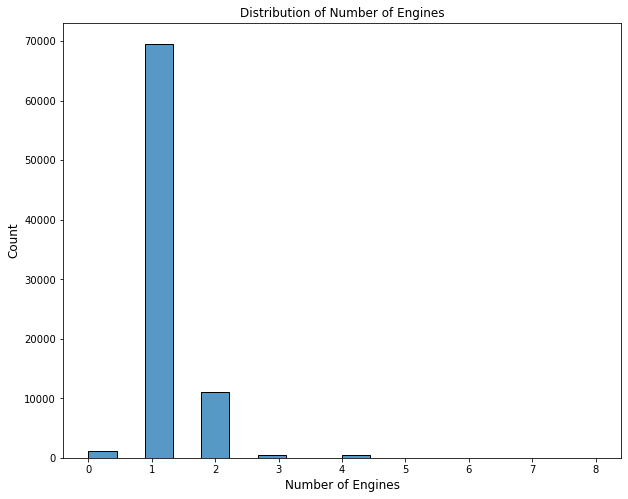

In [324]:
#visualise the histogram for Number of Engines
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Number_of_Engines)
plt.xlabel('Number of Engines', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Number of Engines', fontsize=12)
plt.show()

##### Observation

The histogram plot shows a right skewed plot hence to impute the values of the Number of Engines we can use the median. 

In [325]:
#imputing the Number of Engines using the median and filling up the missing values using fillna

aviation_df1['Number_of_Engines'].fillna((aviation_df1['Number_of_Engines'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

In [326]:
#view the unique values in the Total Fatal Injuries
aviation_df1['Total_Fatal_Injuries'].value_counts().head(40)

0.0      59675
1.0       8883
2.0       5173
3.0       1589
4.0       1103
5.0        346
6.0        216
7.0        101
8.0         70
10.0        45
9.0         42
14.0        19
11.0        17
13.0        11
12.0        11
17.0         6
18.0         6
20.0         6
23.0         5
15.0         5
19.0         5
25.0         4
16.0         4
21.0         4
71.0         3
97.0         3
65.0         3
24.0         3
154.0        3
34.0         3
49.0         2
30.0         2
113.0        2
46.0         2
92.0         2
160.0        2
52.0         2
70.0         2
82.0         2
118.0        2
Name: Total_Fatal_Injuries, dtype: int64

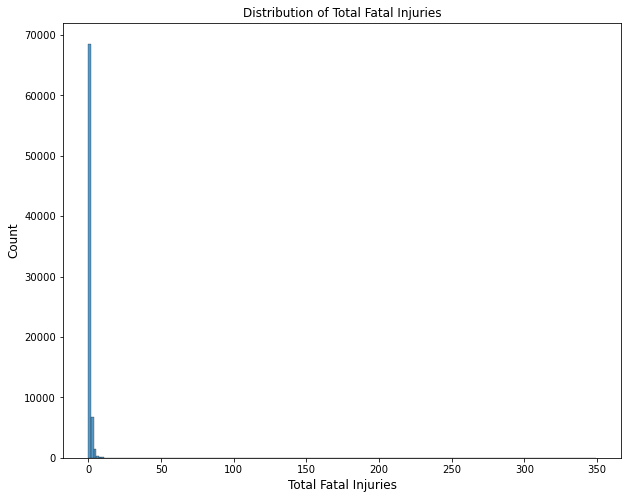

In [327]:
#visualise the histogram for Total Fatal Injuries
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Total_Fatal_Injuries, bins=200)
plt.xlabel('Total Fatal Injuries', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Fatal Injuries', fontsize=12)
plt.show()

##### Observation

The histogram shows a positive skewness which can also be deduced from the high number of counts for the lower numbers of total fatal injuries. An appropriate method for imputing missing values would be to impute with the median. 

In [328]:
#imputing the Total Fatal Injuries using the median and filling up the missing values using fillna

aviation_df1['Total_Fatal_Injuries'].fillna((aviation_df1['Total_Fatal_Injuries'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

In [329]:
#view the unique values in the Total Serious Injuries
aviation_df1['Total_Serious_Injuries'].value_counts()

0.0      63289
1.0       9125
2.0       2815
3.0        629
4.0        258
5.0         78
6.0         41
7.0         27
9.0         16
8.0         13
10.0        13
13.0         9
11.0         6
26.0         5
14.0         5
12.0         5
25.0         3
20.0         3
28.0         3
17.0         2
50.0         2
59.0         2
21.0         2
47.0         2
55.0         1
88.0         1
41.0         1
67.0         1
33.0         1
18.0         1
161.0        1
81.0         1
39.0         1
137.0        1
27.0         1
15.0         1
45.0         1
125.0        1
23.0         1
44.0         1
106.0        1
22.0         1
34.0         1
16.0         1
35.0         1
53.0         1
43.0         1
63.0         1
19.0         1
60.0         1
Name: Total_Serious_Injuries, dtype: int64

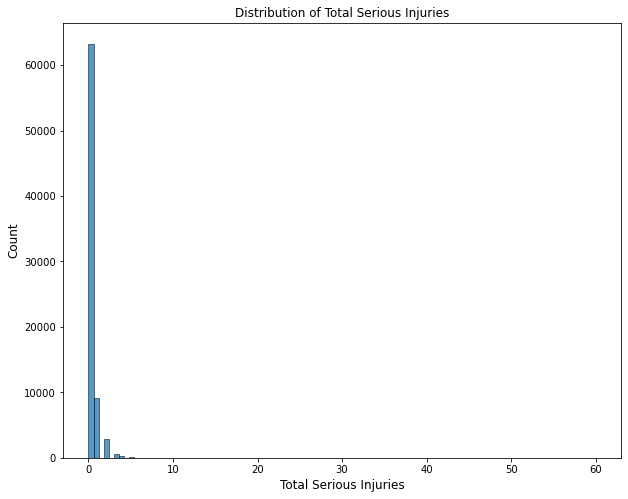

In [330]:
#visualise the histogram for Total Serious Injuries
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Total_Serious_Injuries, bins=100, binrange=(0,60))
plt.xlabel('Total Serious Injuries', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Serious Injuries', fontsize=12)
plt.show()

##### Observation

The histogram shows a positive skewness which can also be deduced from the high number of counts for the lower numbers of total serious injuries. An appropriate method for imputing missing values would be to impute with the median. 

In [331]:
#imputing the Total Serious Injuries using the median and filling up the missing values using fillna

aviation_df1['Total_Serious_Injuries'].fillna((aviation_df1['Total_Serious_Injuries'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

In [332]:
#view the unique values in the Total Minor Injuries
aviation_df1['Total_Minor_Injuries'].value_counts()

0.0      61454
1.0      10320
2.0       3576
3.0        784
4.0        372
5.0        129
6.0         67
7.0         59
9.0         22
8.0         20
13.0        14
12.0        11
10.0        11
14.0        10
11.0         9
17.0         8
18.0         6
19.0         6
22.0         5
24.0         5
15.0         4
33.0         4
16.0         4
25.0         4
23.0         3
21.0         3
32.0         3
20.0         3
27.0         3
26.0         3
30.0         2
36.0         2
42.0         2
28.0         2
38.0         2
50.0         2
31.0         2
43.0         1
39.0         1
65.0         1
47.0         1
57.0         1
58.0         1
29.0         1
45.0         1
62.0         1
71.0         1
200.0        1
125.0        1
96.0         1
69.0         1
380.0        1
68.0         1
171.0        1
35.0         1
40.0         1
84.0         1
Name: Total_Minor_Injuries, dtype: int64

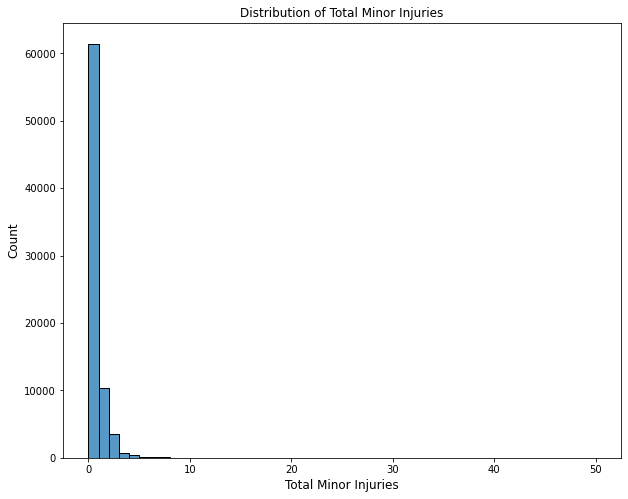

In [333]:
#visualise the histogram for Total Minor Injuries
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Total_Minor_Injuries, bins=50, binrange=(0,50))
plt.xlabel('Total Minor Injuries', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Minor Injuries', fontsize=12)
plt.show()

##### Observation

The histogram shows a positive skewness which can also be deduced from the high number of counts for the lower numbers of total serious injuries. An appropriate method for imputing missing values would be to impute with the median. 

In [334]:
#imputing the Total Minor Injuries using the median and filling up the missing values using fillna

aviation_df1['Total_Minor_Injuries'].fillna((aviation_df1['Total_Minor_Injuries'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

In [335]:
#view the unique values in the Total Uninjured
aviation_df1['Total_Uninjured'].value_counts()

0.0      29879
1.0      25101
2.0      15988
3.0       4313
4.0       2662
         ...  
325.0        1
230.0        1
260.0        1
251.0        1
414.0        1
Name: Total_Uninjured, Length: 379, dtype: int64

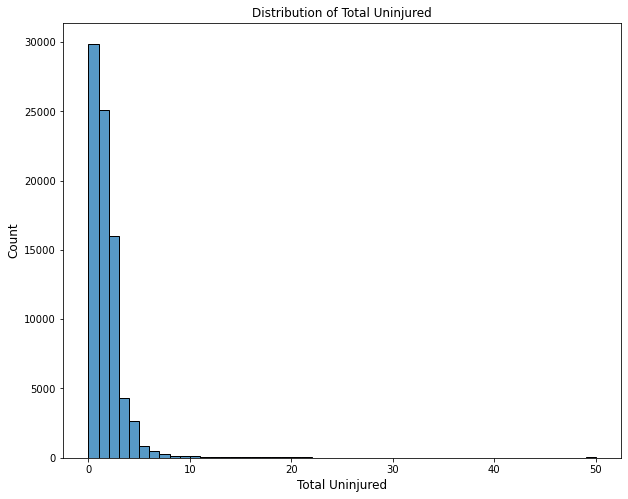

In [336]:
#visualise the histogram for Total Uninjured
fig,ax = plt.subplots(figsize=(10,8))
sns.histplot(aviation_df1.Total_Uninjured, bins=50, binrange=(0,50))
plt.xlabel('Total Uninjured', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Total Uninjured', fontsize=12)
plt.show()

##### Observation

The histogram shows a positive skewness which can also be deduced from the high number of counts for the lower numbers of total serious injuries. An appropriate method for imputing missing values would be to impute with the median. 

In [337]:
#imputing the Total Uninjured using the median and filling up the missing values using fillna

aviation_df1['Total_Uninjured'].fillna((aviation_df1['Total_Uninjured'].median()), inplace=True)
aviation_df1.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines             0
Engine_Type                7077
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6381
Publication_Date          13771
Event_Ye

#### Dealing with missing data for categorical variables

Given the high number of missing values for the categorical variables, there will be a need to drop some of the columns which may not be key for our analysis. For those that are key, then we may need to either impute with the mode or introduce a new variable "Unknown" for the null/missing values. 

In [338]:
#checking the statistical summary of categorical variables

aviation_df1.describe(include='O').T

,count,unique,top,freq
Event_Id,88889,87951,20001212X19172,3
Investigation_Type,88889,2,Accident,85015
Accident_Number,88889,88863,DCA22WA130,2
Location,88837,27758,"ANCHORAGE, AK",434
Country,88663,219,United States,82248
Latitude,34382,25592,332739N,19
Longitude,34373,27156,0112457W,24
Airport_Code,50249,10375,NONE,1488
Airport_Name,52790,24871,Private,240
Injury_Severity,87889,109,Non-Fatal,67357


In [273]:
#checking unique values count for Location

aviation_df1['Location'].value_counts()

ANCHORAGE, AK          434
MIAMI, FL              200
ALBUQUERQUE, NM        196
HOUSTON, TX            193
CHICAGO, IL            184
                      ... 
BERKELEY TOWNSH, NJ      1
WESTLAKE VLG, CA         1
East Highlands, CA       1
Butler, OH               1
FAIRFIELD, CT            1
Name: Location, Length: 27758, dtype: int64

In [274]:
#ensuring standard format for all data by converting all the names to uppercase
aviation_df1['Location']=aviation_df1['Location'].str.upper()

In [277]:
#checking the impact eg. initally Anchorage, AK had 434 value counts but now has 548 meaning there was some similar information in lowercase
aviation_df1['Location'].value_counts()

ANCHORAGE, AK      548
MIAMI, FL          275
HOUSTON, TX        271
ALBUQUERQUE, NM    265
CHICAGO, IL        256
                  ... 
GOSSI, MALI          1
PREVOST, WA          1
RINGSTED,            1
GALT, MO             1
FAIRFIELD, CT        1
Name: Location, Length: 21978, dtype: int64

In [278]:
#checking null values in the Location variable
aviation_df1['Location'].isna().sum()

52

In [ ]:
#dropping the rows with null values given they are few and it is not prudent to impute the location of an accident using the mode as this would skew the data